#Estudiante: Daniel Felipe Campuzano Rodriguez
#Materia: HPC-2
#Fecha: 23/04/2022
#Tema: Validacion Tercer Parcial

##Se importan cada una de las librerias necesarias para realizar las siguientes acciones 
* Lectura del Dataset.
* Graficar matriz de correlacion, dispersion de datos y graficar de las variables del dataset.
* Division de datos "Train y Test" del dataset (Variables de entrenamiento y variables de test).
* Escalador para los datos.
* Tuberia o "Pipeline".
* Libreria de Regresion lineal de sklearn.
* Metrica implementada para evidenciar la precision del modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.figure import figaspect
from sklearn.pipeline import Pipeline
from IPython.core.pylabtools import figsize
from sklearn.metrics import r2_score

Se carga el dataset en Google drive y se realiza su lectura mediante la ruta guardada en la variable "URL"

In [2]:
url = "/content/drive/MyDrive/CSV/06-diamonds/diamondsHPC.csv"

Mediante la libreria "Pandas" se realiza la lectura de la variable que contiene la ruta del dataset, lo cual nos va a permitir tener un dataframe de datos entendible en nuestro modelo.

In [3]:
dataframe = pd.read_csv(url)

##Inicia la exploracion del Dataframe "Diamons"

Se muestra la cabecera o los 5 primeros datos del dataframe 

In [4]:
dataframe.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    0      0        0   61.5   55.0    326  3.95  3.98  2.43
1   0.21    1      0        1   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      0        2   56.9   65.0    327  4.05  4.07  2.31
3   0.29    1      1        3   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      2        0   63.3   58.0    335  4.34  4.35  2.75

Se implementa la Funcion "describe()" permitiendo describir valores como:
* Promedio de datos por columna.
* Conteo de datos por columna.
* Desviacion de cada columna.
* Porcentajes acumulados.
* Minimos y maximos en el dataframe.

In [5]:
dataframe.describe()

carat           cut         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      1.228940      3.174416      2.256136     61.749405   
std        0.474011      1.265976      2.050156      1.766539      1.432621   
min        0.200000      0.000000      0.000000      0.000000     43.000000   
25%        0.400000      0.000000      1.000000      1.000000     61.000000   
50%        0.700000      1.000000      4.000000      2.000000     61.800000   
75%        1.040000      3.000000      5.000000      3.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  
mean      57.457184   3932.799722      5.731157      5.734526      3.538734  
std        2.234491   3989.439738      1.121761      1.142135      0.705699  
min       43.000000    326.000000      0.000000      0.000000      0.000000  
25%       56.000000    950.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5324.250000      6.540000      6.540000      4.040000  
max       95.000000  18823.000000     10.740000     58.900000     31.800000

Mediante la funcion "column" Se imprimen los nombres de las columnas del dataframe 

In [6]:
dataframe.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Usando la funcion "info()" se muestran cada una de las columnas con su respectivo numero de datos y el tipo de dato que contiene.
En este caso se puede ver que ninguna de las columnas tiene datos nulos y que se manejan datos tipo float64 e int64

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Se grafica la matriz de correlacion del dataframe, la cual nos da informacion de las variables contenidas, es decir si son dependientes o independientes y que valor representa.

En este caso Se puede realizar el estudio del precio en dolares de los diamantes, dependiendo de las variables independientes dadas
('cut', 'color', 'carat', 'depth', 'clarity' y 'table').

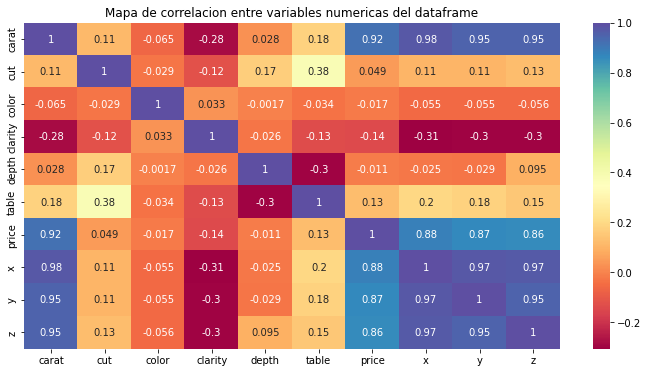

In [8]:
MatCorrelacion = dataframe.corr()
plt.figure(figsize=(12,6))
sns.heatmap(MatCorrelacion,annot=True,cmap='Spectral')
plt.title('Mapa de correlacion entre variables numericas del dataframe')
plt.show()

Se grafica cada una de las variables independientes del dataframe, cada una con su "KDE" que representa la curva de comportamiento y  probabilidad de una variable no aleatoria.

Mediante el estudio e interpretacion de las graficas se puede ver que se presenta una distribucion normal ('Campanas de Gauss') de los datos.

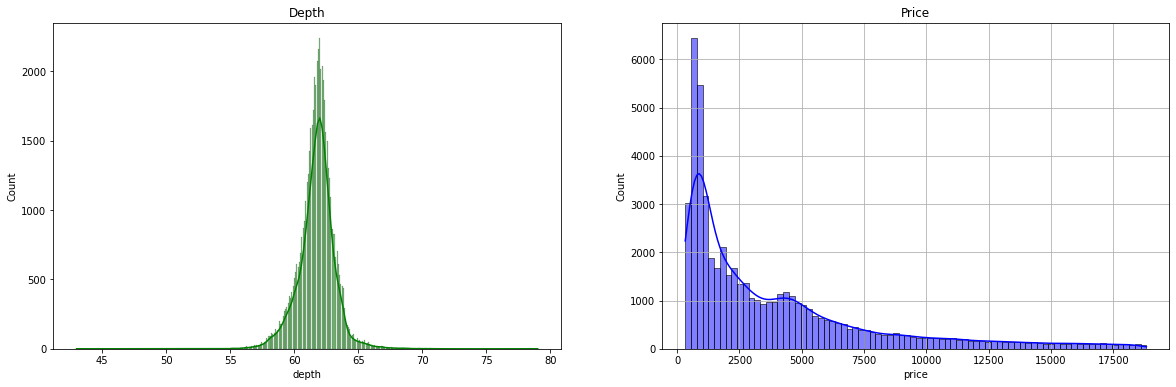

In [9]:
fig, axes =plt.subplots(1,2,figsize=(20,6))
plt.grid()
fig.suptitle('') 
sns.histplot(dataframe['depth'],ax=axes[0],kde=True,color="g")
axes[0].set_title('Depth')
sns.histplot(dataframe['price'],ax=axes[1],kde=True,color="b")
axes[1].set_title('Price')
plt.show()

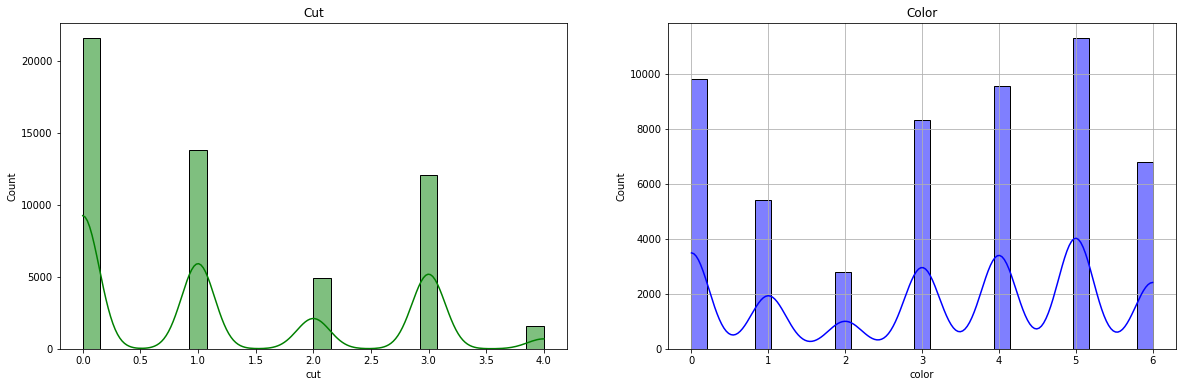

In [10]:
fig2, axes =plt.subplots(1,2,figsize=(20,6))
plt.grid()
fig2.suptitle('') 
sns.histplot(dataframe['cut'],ax=axes[0],kde=True,color="g")
axes[0].set_title('Cut')
sns.histplot(dataframe['color'],ax=axes[1],kde=True,color="b")
axes[1].set_title('Color')
plt.show()

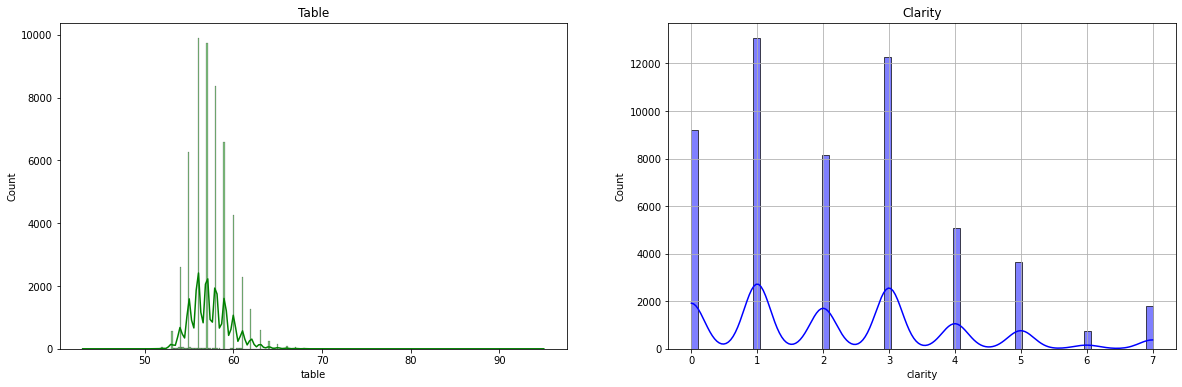

In [11]:
fig3, axes =plt.subplots(1,2,figsize=(20,6))
plt.grid()
fig3.suptitle('') 
sns.histplot(dataframe['table'],ax=axes[0],kde=True,color="g")
axes[0].set_title('Table')
sns.histplot(dataframe['clarity'],ax=axes[1],kde=True,color="b")
axes[1].set_title('Clarity')
plt.show()

Se implementa la funcion pariplot que genera una grilla en la que se introducen diferentes graficas, en este caso se muestra la combinacion de variables, su dispersion, su relacion y sus tendencias dependiendo la combinacion de ejes.

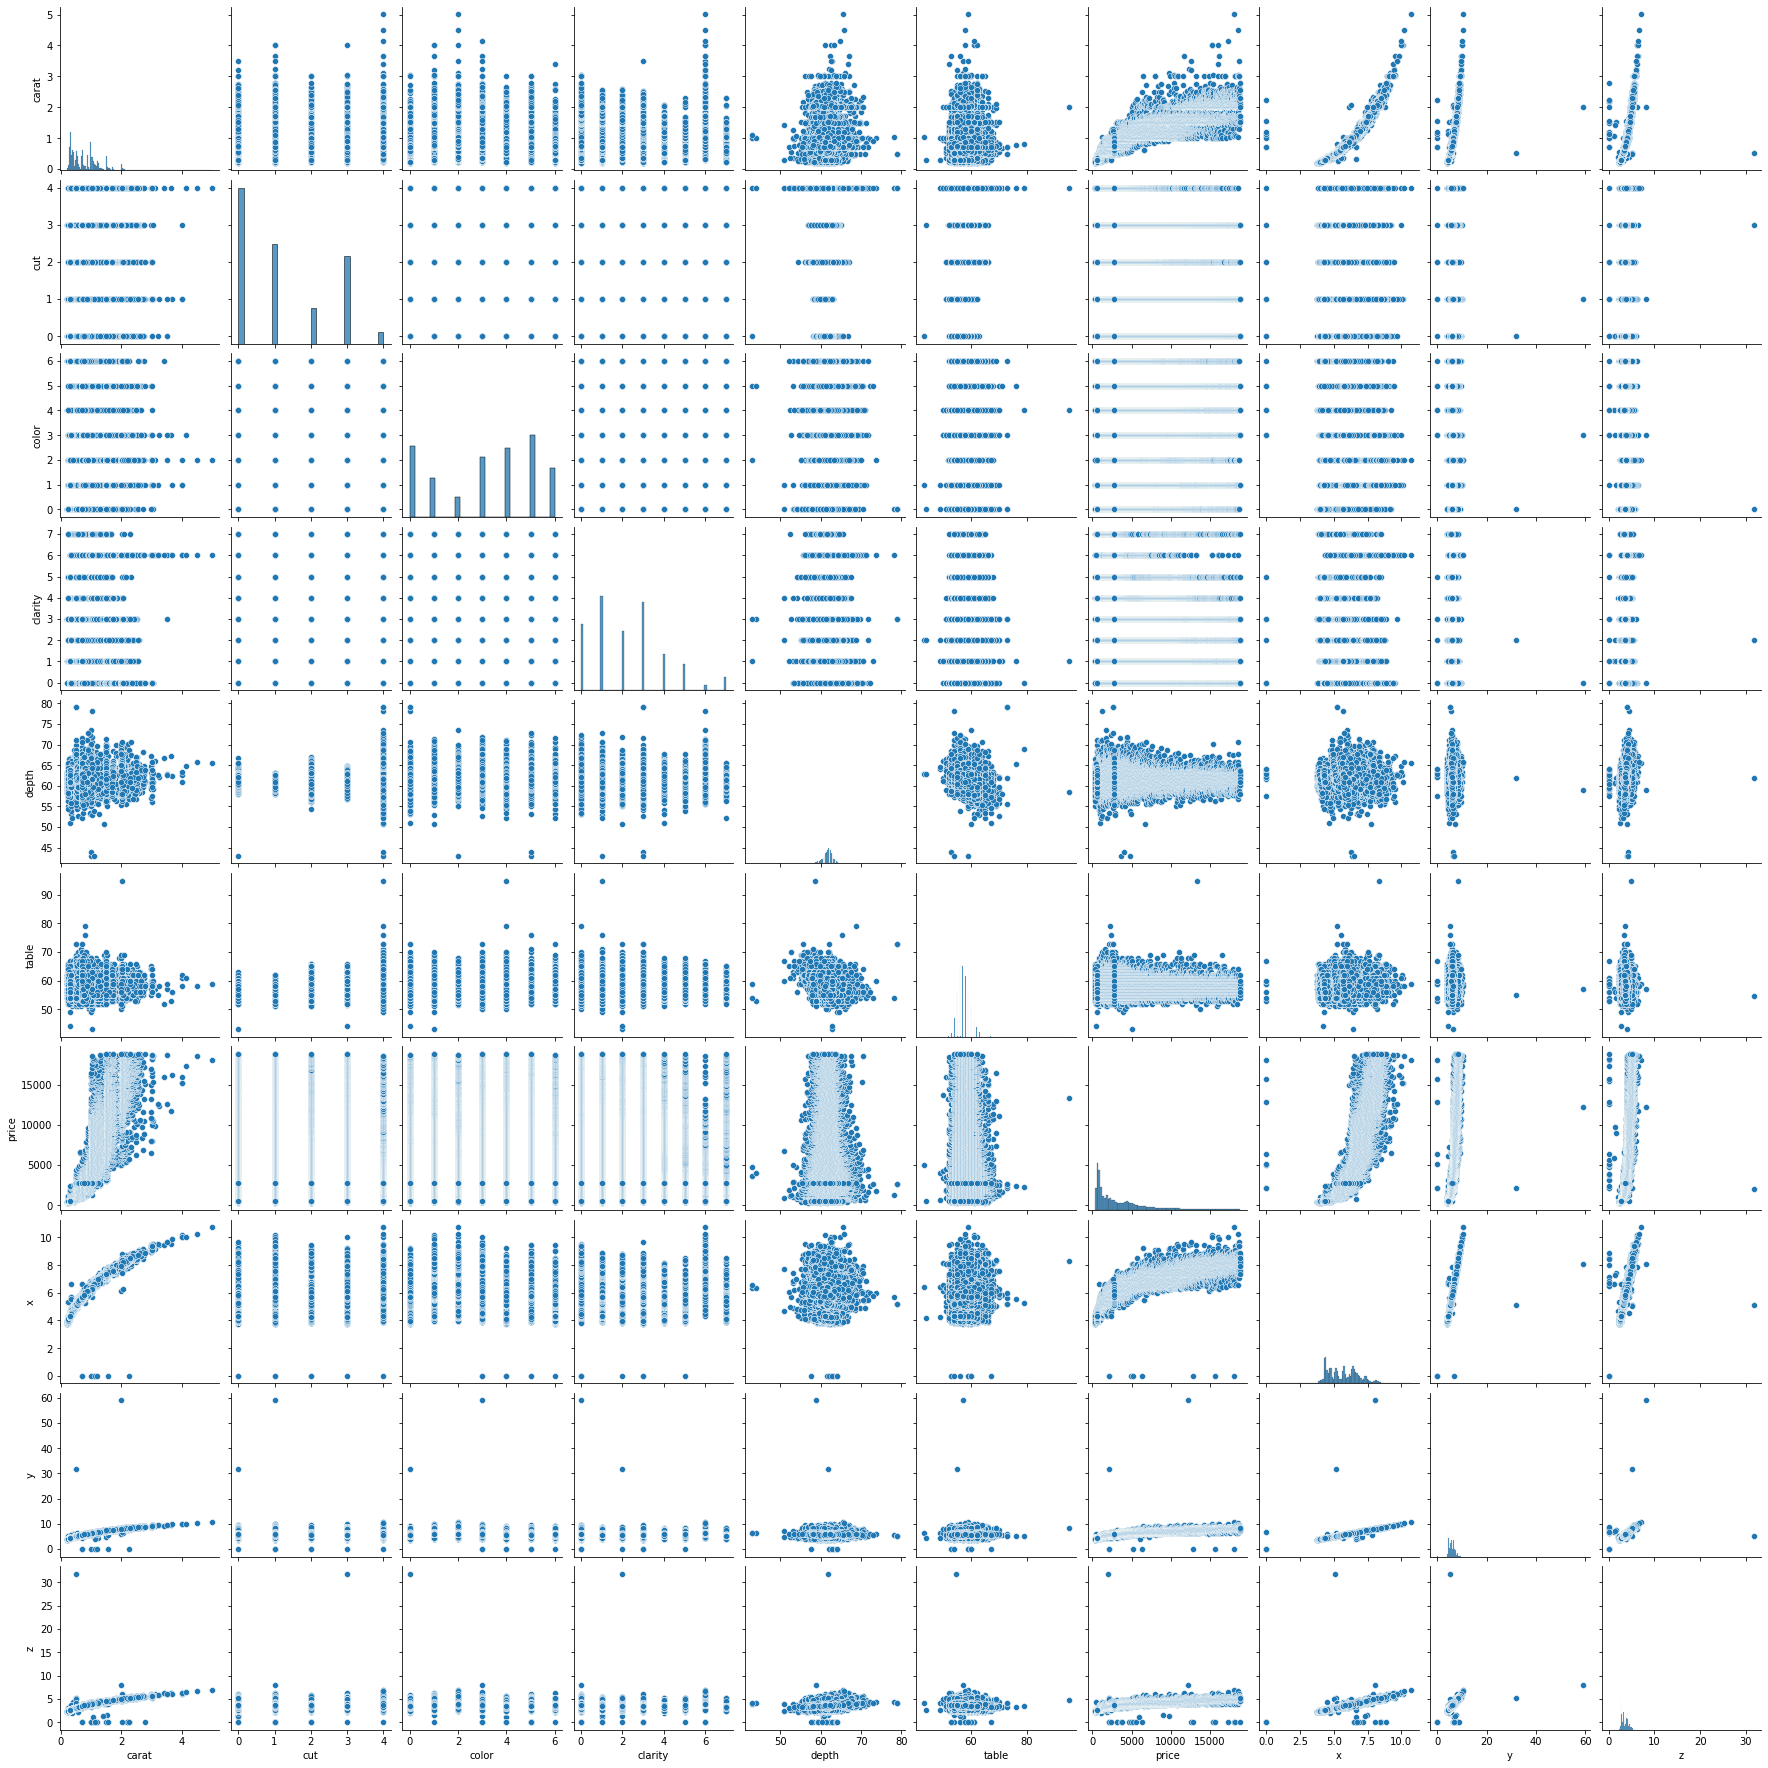

In [12]:
sns.pairplot(dataframe)

##Se inicia el entrenamiento y testeo de los datos para realizar el modelo de Regresion Lineal

Realizamos la division de las variables dependientes e independientes para entrenar nuestro modelo.

In [13]:
X = dataframe.drop(['price'],axis=1)
y = dataframe['price']

Se crean las variables de entrenamiento y testeo ('X_train, X_test, y_train, y_test'), se implementa la funcion 'Train Test Split' de sklearn para dividir los datos de las variables 'X,y' de manera ordenada desactivando la funcion Shuffle (Aleatorio) y con un tamaño de 0,2 del total de datos por muestra.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

Se crea una tuberia o Pipeline, la cual permite hacer la validacion cruzada con el escalador estandar y los metodos de regresion lineal.


In [15]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

Entrenamos la tuberia con las variables ('X_train, y_train) 

In [16]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

Se realiza una prediccion de estado conforme a los datos de entrenamiento ingresados.

In [17]:
y_hatSk = pipe.predict(X_train)

Entrenamos la tuberia con las variables ('X_test, y_test')

In [18]:
pipe.fit(X_test, y_test)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

Se realiza una prediccion de estado conforme a los datos de test ingresados.

In [19]:
y_hatSk_test = pipe.predict(X_test)

##Modelo de Regresion Lineal 

Se realiza la regresion lineal y como primer paso se entrena el modelo con los las variables ('X_train, y_train')

In [20]:
Regression = LinearRegression().fit(X_train, y_train)

Obtenemos el punto de corte de la regresion (Punto de corte entre ejes)

In [21]:
Regression.intercept_

13000.299120595759

Se obtiene el score o precision de la regresion lineal con las variables de entrenamiento.

In [22]:
Regression.score(X_train, y_train)

0.871558110664378

In [53]:
pipe.fit(X_train, y_train)
y_hatSk_test = pipe.predict(X_test)

Se realiza la regresion lineal y como primer paso se entrena el modelo con los las variables ('X_test, y_test')

In [24]:
Regression = LinearRegression().fit(X_test, y_test)

Se obtiene el score o precision de la regresion lineal con las variables de test.

In [25]:
Regression.score(X_test, y_test)

0.752992718142954

In [26]:
Regression.fit(X_train,y_train)


LinearRegression()

Se realiza una prediccion con las variables de entrenamiento.

In [27]:
X_predict=Regression.predict(X_train)
X_predict

array([ -967.76392408, -1048.13843547,  -549.98984057, ...,
         216.08743784,  1768.301961  ,  1821.1597179 ])

Se realiza una prediccion con las variables de test.

In [54]:
X_predict=Regression.predict(X_test)
X_predict

array([1168.18044364, 1148.0369714 , 1277.65134804, ..., 2547.60363201,
       3761.53695796, 3301.55265118])

##Comparacion de datos C++ VS Python 

Promedio de Las columnas del Dataframe en Python



In [28]:
dataframe.mean()

carat         0.797940
cut           1.228940
color         3.174416
clarity       2.256136
depth        61.749405
table        57.457184
price      3932.799722
x             5.731157
y             5.734526
z             3.538734
dtype: float64

Promedio de Las columnas del Dataframe en C++

image.png

##Comparacion de datos Normalizados

Primeros 5 Datos normalizados en Python

In [29]:
normalized_dataframe=(dataframe-dataframe.mean())/dataframe.std()

In [30]:
normalized_dataframe.head()

carat       cut     color   clarity     depth     table     price  \
0 -1.198157 -0.970744 -1.548378 -1.277151 -0.174090 -1.099662 -0.904087   
1 -1.240350 -0.180840 -1.548378 -0.711072 -1.360726  1.585514 -0.904087   
2 -1.198157  0.609064 -1.548378 -0.144993 -3.384987  3.375631 -0.903836   
3 -1.071577 -0.180840 -1.060610  0.421085  0.454129  0.242926 -0.902081   
4 -1.029384  0.609064 -0.572842 -1.277151  1.082348  0.242926 -0.901831   

          x         y         z  
0 -1.587823 -1.536181 -1.571115  
1 -1.641310 -1.658759 -1.741159  
2 -1.498677 -1.457382 -1.741159  
3 -1.364959 -1.317293 -1.287708  
4 -1.240155 -1.212227 -1.117663

Primeros 5 Datos normalizados en C++

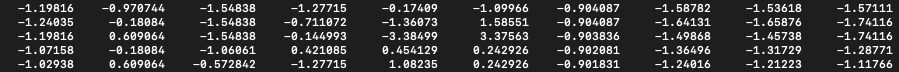

##Comparacion de resultados Obtenidos en Vector de Costo, Vector Theta y Y_hat

Se cargan los archivos de los resultados obtenidos en C++ y se guardan en variables

In [31]:
CostoC = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /VectorCosto.txt", header=None)
ThetaC = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /VectorTheta.txt", header=None)
Y_hat_C = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /y_train_hat.txt", header=None)

In [39]:
CostoC_Test = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /VectorCosto_test.txt", header=None)
ThetaC_Test = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /VectorTheta_test.txt", header=None)
Y_hat_C_Test = pd.read_csv("/content/drive/MyDrive/CSV/EIGEN /y_test_hat.txt", header=None)

#Graficas de variables (y_train, y_hatSk,y_test, y_hatSk_test)

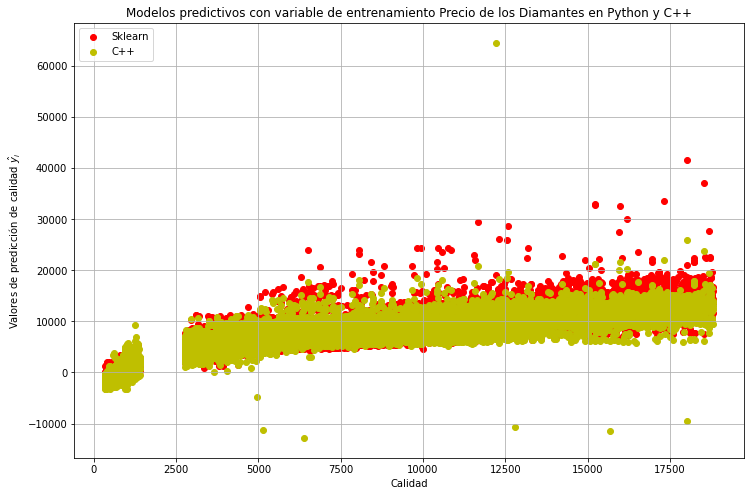

In [41]:
fig, axes = plt.subplots(figsize=(12, 8))
plt.scatter(y_train, y_hatSk, c='r', label='Sklearn')
plt.scatter(y_train, Y_hat_C, c='y', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Modelos predictivos con variable de entrenamiento Precio de los Diamantes en Python y C++')
plt.xlabel('Calidad')
plt.ylabel('Valores de predicción de calidad $\hat{y_i}$')
plt.show()

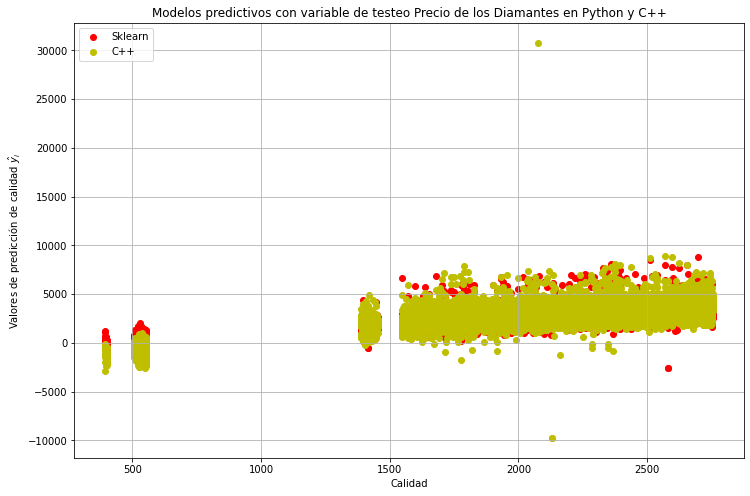

In [42]:
fig, axes = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_hatSk_test, c='r', label='Sklearn')
plt.scatter(y_test, Y_hat_C_Test, c='y', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Modelos predictivos con variable de testeo Precio de los Diamantes en Python y C++')
plt.xlabel('Calidad')
plt.ylabel('Valores de predicción de calidad $\hat{y_i}$')
plt.show()

#Graficas de Costo en C++

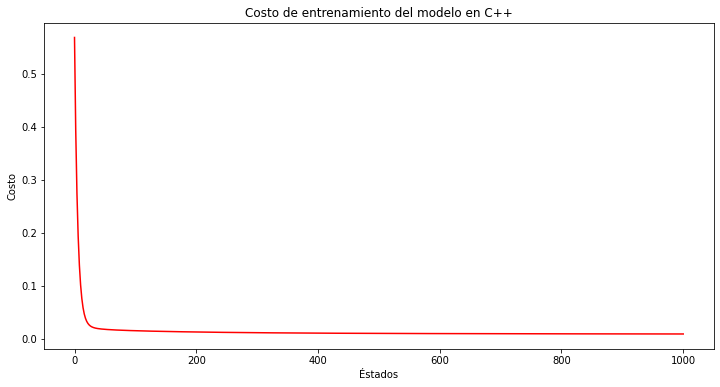

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(CostoC,color='r')
plt.title('Costo de entrenamiento del modelo en C++')
plt.ylabel(r'Costo')
plt.xlabel('Éstados')
plt.show()

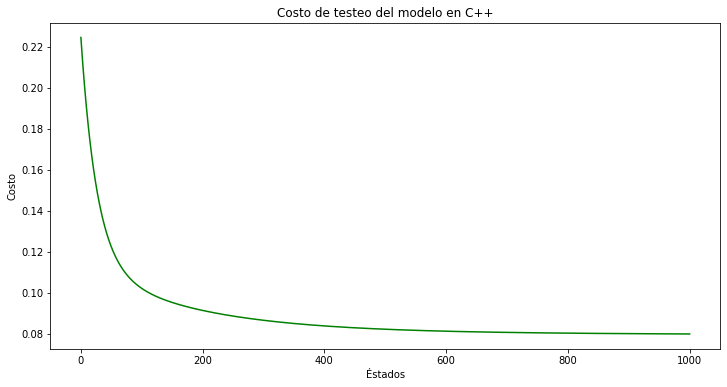

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(CostoC_Test,color='g')
plt.title('Costo de testeo del modelo en C++')
plt.ylabel(r'Costo')
plt.xlabel('Éstados')
plt.show()

##Comparacion de Metricas de Rendimiento

Accuracy obtenido en C++

image.png

Accuracy obtenido en Python

In [52]:
r2 = r2_score(y_train, y_hatSk)
r2

0.871558110664378